# **Importing Necessary Libraries**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [2]:
df = pd.read_csv("dsp_train.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
df.shape

(15304, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


# **Check for NULL Values**

---



In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='gender', ylabel='count'>

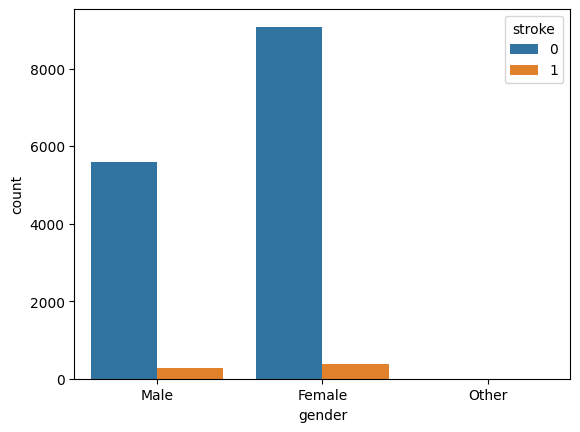

In [9]:
sns.countplot(x="gender", data=df, hue="stroke")

<Axes: xlabel='age', ylabel='bmi'>

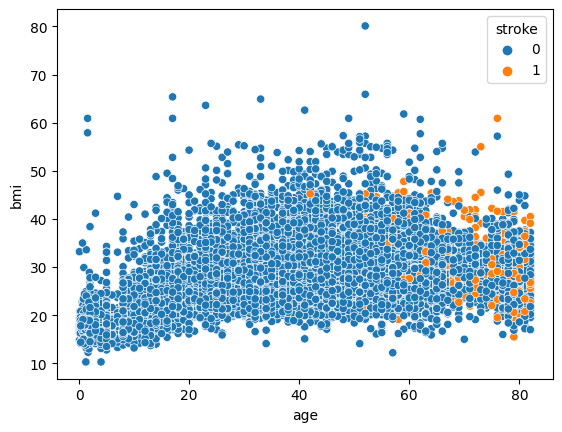

In [10]:
sns.scatterplot(x="age", y="bmi", data=df, hue="stroke")

<Axes: xlabel='heart_disease', ylabel='count'>

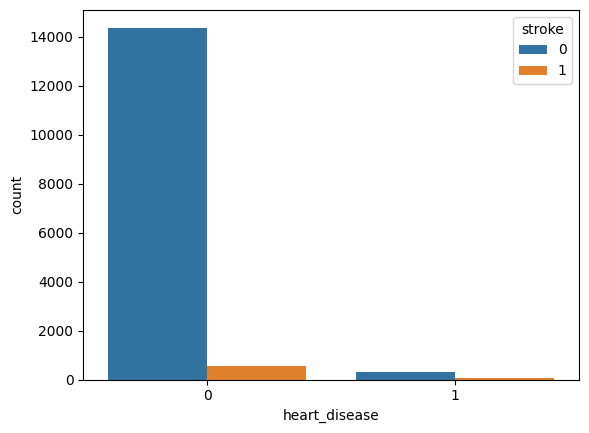

In [11]:
sns.countplot(x="heart_disease", data=df, hue="stroke")

<Axes: xlabel='smoking_status', ylabel='count'>

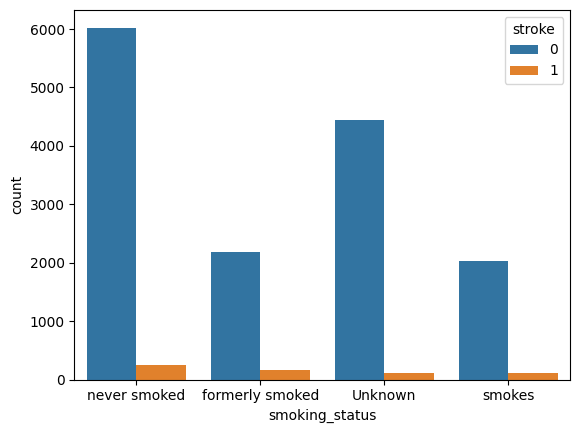

In [55]:
sns.countplot(x="smoking_status", data=df, hue="stroke")

# **Seperating Dependent & Independent Variables**

---



In [12]:
X = df.drop(["id", "stroke"], axis=1)
y = df["stroke"]

In [13]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

# **Label Encoding**

---



In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
cat_cols = dict()

for i in range(len(X.dtypes)):

  col = X.columns[i]

  if(X.dtypes[i] == object):

    print(col)

    cat_cols[col] = LabelEncoder()
    X[col] = cat_cols[col].fit_transform(X[col])

gender
ever_married
work_type
Residence_type
smoking_status


In [18]:
for i in cat_cols:

  print(i, ":", cat_cols[i].classes_)

gender : ['Female' 'Male' 'Other']
ever_married : ['No' 'Yes']
work_type : ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Residence_type : ['Rural' 'Urban']
smoking_status : ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


# **Splitting into Training & Testing Set**

---



In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12243, 10)
(3061, 10)
(12243,)
(3061,)


# **Model Building - XGB Classifier**

---



In [22]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [25]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [26]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [27]:
xgbc_cv.best_params_

{'subsample': 0.9,
 'n_estimators': 100,
 'min_child_weight': 10,
 'max_depth': 2,
 'max_delta_step': 2,
 'gamma': 0.3,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.8}

In [28]:
xgbc_model = XGBClassifier( subsample = 0.9,
                           n_estimators = 100,
                            min_child_weight = 10,
                            max_depth = 2,
                            max_delta_step = 2,
                            gamma = 0.3,
                            colsample_bytree = 0.6,
                            colsample_bylevel = 0.8
                            )

In [29]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=2, max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
xgbc_model.score(X_test, y_test)

0.9604704344985299

# **Model Building - Random Forest Classifier**

---



In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [34]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [35]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [36]:
rfc_cv.best_params_

{'max_features': 4, 'max_depth': 12}

In [37]:
rfc_model = RandomForestClassifier(
    max_features=4, max_depth=12
)

In [38]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=4)

In [39]:
rfc_model.score(X_test, y_test)

0.9598170532505718

# **Testing Data**

---



In [40]:
test_df = pd.read_csv("dsp_test.csv")
test_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [41]:
test_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [42]:
X_subs = test_df.drop("id", axis=1)

In [43]:
X_subs.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [44]:
for i in cat_cols:

  X_subs[i] = cat_cols[i].transform(X_subs[i])

In [45]:
X_subs.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,57.0,0,0,1,2,0,82.54,33.4,0
1,1,70.0,1,0,1,2,1,72.06,28.5,0
2,0,5.0,0,0,0,4,1,103.72,19.5,0
3,0,56.0,0,0,1,0,1,69.24,41.4,3
4,1,32.0,0,0,1,2,0,111.15,30.1,3


# **Submission File - 1**

---



In [46]:
y_subs1 = xgbc_model.predict(X_subs)

In [47]:
subs1_df = pd.DataFrame({
    "id": test_df["id"],
    "stroke": y_subs1
})

In [48]:
subs1_df.head()

,id,stroke
0,15304,0
1,15305,0
2,15306,0
3,15307,0
4,15308,0


In [49]:
subs1_df.to_csv("submission1.csv", index=False)

# **Submission File - 2**

---



In [50]:
y_subs2 = rfc_model.predict(X_subs)

In [51]:
subs2_df = pd.DataFrame({
    "id": test_df["id"],
    "stroke": y_subs2
})

In [53]:
subs2_df.head()

,id,stroke
0,15304,0
1,15305,0
2,15306,0
3,15307,0
4,15308,0


In [54]:
subs2_df.to_csv("submission2.csv", index=False)